Abstract

This project focuses on analyzing demographic and dietary data from the National Health and Nutrition Examination Survey (NHANES) to uncover insights into population-level health and nutritional patterns. Specifically, the task involves merging demographic data with dietary datasets using shared identifiers, such as SEQN, to enable detailed analysis. The goal is to explore relationships between variables like age, gender, ethnicity, and nutrient intake, providing a foundation for understanding how demographic factors influence dietary behaviors and nutritional health.

The project utilizes Python and jupyter for data wrangling, merging, and analysis, leveraging tools like pandas for data manipulation. By integrating dietary intake summaries (e.g., total nutrient intakes) with demographic information, this study aims to highlight trends and disparities in nutrition across diverse population groups. The findings will contribute to broader discussions on public health and nutritional policy.



# First, let us import libraries

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px




# Second, let us load the data


In [126]:
# Load datasets (replace 'path_to_file' with your actual file paths)
demographics = pd.read_sas("data/DEMO_L.xpt")
Total_Nutrient_Intakes= pd.read_sas("data/DR1TOT_L.xpt")
BloodPressure= pd.read_sas("data/(BloodPressure)BPXO_L.xpt")
cholesterol= pd.read_sas("data/Cholesterol-Total.xpt")
Vitamin_D= pd.read_sas("data/Vitamin_D.xpt")


##### Make sure all data have the same SEQN to merge them.

In [127]:
print(demographics.head())


       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1  130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2  130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3  130381.0      12.0       2.0       2.0       5.0       NaN       5.0   
4  130382.0      12.0       2.0       1.0       2.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHRGND  DMDHRAGZ  DMDHREDZ  DMDHRMAZ  \
0       6.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
1       3.0       2.0       NaN  ...       NaN       NaN       NaN       NaN   
2       2.0       1.0       NaN  ...       NaN       NaN       NaN       NaN   
3       7.0       1.0      71.0  ...       2.0       2.0       2.0       3.0   
4       3.0       2.0      34.0  ...       2.0       2.0       3.0       1.0   

   DMDHSEDZ      WTINT2YR      WTMEC2YR  SDMVSTRA  SDMVPSU  INDFMPIR

In [128]:
print(Total_Nutrient_Intakes.head())

       SEQN        WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0  130378.0  61366.555827   70554.222162       1.0      73.0    2.0     2.0   
1  130379.0  34638.056480   36505.468348       1.0      73.0    2.0     2.0   
2  130380.0  84728.261560  103979.190677       1.0      73.0    2.0     2.0   
3  130381.0  61737.133446   75009.220819       1.0      91.0    2.0     2.0   
4  130382.0  75846.746917  172361.851828       1.0      73.0    2.0     2.0   

   DR1DBIH  DR1DAY  DR1LANG  ...  DRD370QQ  DRD370R  DRD370RQ  DRD370S  \
0     40.0     4.0      1.0  ...       NaN      2.0       NaN      2.0   
1     19.0     4.0      1.0  ...       1.0      2.0       NaN      2.0   
2     16.0     4.0      1.0  ...       NaN      2.0       NaN      2.0   
3     23.0     5.0      1.0  ...       NaN      2.0       NaN      2.0   
4     27.0     6.0      1.0  ...       NaN      2.0       NaN      2.0   

   DRD370SQ  DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V  
0       NaN      2.

# Merge datasets

Merge datasets using SEQN (common identifier) 

In [129]:
# Merge datasets using SEQN (common identifier)
merged_df = demographics.merge(Total_Nutrient_Intakes, on="SEQN") \
                        .merge(BloodPressure, on="SEQN") \
                        .merge(cholesterol, on="SEQN") \
                        .merge(Vitamin_D, on="SEQN")


In [130]:
# Inspect the merged data

print(merged_df.head())


       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  130378.0      12.0       2.0       1.0      43.0       NaN       5.0   
1  130379.0      12.0       2.0       1.0      66.0       NaN       3.0   
2  130380.0      12.0       2.0       2.0      44.0       NaN       2.0   
3  130386.0      12.0       2.0       1.0      34.0       NaN       1.0   
4  130387.0      12.0       2.0       2.0      68.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  LBDTCSI     WTPH2YR_y  LBXVIDMS  \
0       6.0       2.0       NaN  ...     6.83  56042.129410      58.9   
1       3.0       2.0       NaN  ...     5.53  37435.705647      60.5   
2       2.0       1.0       NaN  ...     4.84  85328.844519      39.4   
3       1.0       1.0       NaN  ...     4.73  44526.214135      96.9   
4       3.0       2.0       NaN  ...     5.25  22746.296353      26.7   

       LBDVIDLC  LBXVD2MS  LBDVD2LC  LBXVD3MS      LBDVD3LC  LBXVE3MS  \
0  5.397605e-79      1.57       1.0  

In [131]:

# Save merged data to CSV for further analysis
merged_df.to_csv("merged_nhanes_data.csv", index=False)

summar

The datasets were successfully merged using SEQN as the key, resulting in a consolidated dataset that includes demographic data, nutrient intake for the first and second days, and associated food codes. 

# Data Cleaning

Purpose

The purpose of this code is to perform data cleaning on the merged dataset to ensure it is prepared for analysis. This involves checking for missing values, removing redundant or incomplete columns, handling missing data appropriately, renaming columns for better readability, and saving the cleaned dataset for further analysis.

The specific goals include:

1. Understanding the shape and structure of the merged dataset.
2. Identifying and handling missing values to ensure data completeness.
3. Removing unnecessary columns with a high proportion of missing values.
4. Dealing with duplicates to avoid redundant rows.
5. Renaming columns for better readability and usability.
6. Saving the cleaned dataset for downstream tasks.

In [132]:
# Check the shape of the merged dataset
print("Shape of the merged dataset:", merged_df.shape)


Shape of the merged dataset: (7801, 217)


In [133]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 SEQN          0
SDDSRVYR      0
RIDSTATR      0
RIAGENDR      0
RIDAGEYR      0
           ... 
LBDVD2LC    891
LBXVD3MS    890
LBDVD3LC    890
LBXVE3MS    959
LBDVE3LC    959
Length: 217, dtype: int64


In [134]:
# View basic statistics
print("Basic statistics:\n", merged_df.describe())

Basic statistics:
                 SEQN  SDDSRVYR  RIDSTATR     RIAGENDR     RIDAGEYR  RIDAGEMN  \
count    7801.000000    7801.0    7801.0  7801.000000  7801.000000       0.0   
mean   136349.487117      12.0       2.0     1.539162    44.828740       NaN   
std      3449.490842       0.0       0.0     0.498496    22.722662       NaN   
min    130378.000000      12.0       2.0     1.000000     8.000000       NaN   
25%    133335.000000      12.0       2.0     1.000000    23.000000       NaN   
50%    136382.000000      12.0       2.0     2.000000    47.000000       NaN   
75%    139325.000000      12.0       2.0     2.000000    65.000000       NaN   
max    142310.000000      12.0       2.0     2.000000    80.000000       NaN   

          RIDRETH1     RIDRETH3     RIDEXMON     RIDEXAGM  ...      LBDTCSI  \
count  7801.000000  7801.000000  7801.000000  1728.000000  ...  6765.000000   
mean      3.099859     3.297141     1.525061   165.958333  ...     4.709270   
std       1.042507     

In [135]:
# Check data types
print("Data types:\n", merged_df.dtypes)

Data types:
 SEQN        float64
SDDSRVYR    float64
RIDSTATR    float64
RIAGENDR    float64
RIDAGEYR    float64
             ...   
LBDVD2LC    float64
LBXVD3MS    float64
LBDVD3LC    float64
LBXVE3MS    float64
LBDVE3LC    float64
Length: 217, dtype: object


In [136]:
# Summary of missing values and data types
missing_summary = merged_df.isnull().sum().sort_values(ascending=False)
data_info = merged_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Columns: 217 entries, SEQN to LBDVE3LC
dtypes: float64(216), object(1)
memory usage: 12.9+ MB


In [137]:
# Calculate percentage of missing values for better interpretation
missing_percentage = (missing_summary / len(merged_df)) * 100


In [138]:

# Display top features with the highest percentage of missing values
missing_top = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage (%)': missing_percentage
}).head(20)

missing_top

Missing Count  Missing Percentage (%)
RIDAGEMN           7801              100.000000
DRQSDT5            7799               99.974362
DRD370PQ           7797               99.948725
DRQSDT6            7794               99.910268
DRD370JQ           7789               99.846174
DRQSDT12           7788               99.833355
DRD350JQ           7787               99.820536
DRD370LQ           7785               99.794898
DRQSDT8            7780               99.730804
DRQSDT11           7774               99.653891
DRQSDT10           7768               99.576977
DRQSDT4            7758               99.448789
DRD370QQ           7756               99.423151
DRD370CQ           7745               99.282143
DRD350CQ           7743               99.256506
DRQSDT2            7734               99.141136
DRQSDT9            7731               99.102679
DRD370IQ           7727               99.051404
DRD370HQ           7718               98.936034
DRD370OQ           7718               98.936034

In [139]:
# Step 1: Drop columns with more than 95% missing values
threshold = 0.95  # Threshold for missing values
columns_to_drop = missing_summary[missing_percentage > threshold].index
data_cleaned = merged_df.drop(columns=columns_to_drop)

# Step 2: Handle remaining missing values
# Numeric columns: Fill missing values with the median
numeric_columns = data_cleaned.select_dtypes(include=['float64']).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())

# Categorical columns: Fill missing values with the mode
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(data_cleaned[categorical_columns].mode().iloc[0])

# Step 3: Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Check the cleaned data
data_cleaned.info(), data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       7801 non-null   float64
 1   SDDSRVYR   7801 non-null   float64
 2   RIDSTATR   7801 non-null   float64
 3   RIAGENDR   7801 non-null   float64
 4   RIDAGEYR   7801 non-null   float64
 5   RIDRETH1   7801 non-null   float64
 6   RIDRETH3   7801 non-null   float64
 7   RIDEXMON   7801 non-null   float64
 8   DMDBORN4   7801 non-null   float64
 9   DMDHHSIZ   7801 non-null   float64
 10  WTINT2YR   7801 non-null   float64
 11  WTMEC2YR   7801 non-null   float64
 12  SDMVSTRA   7801 non-null   float64
 13  SDMVPSU    7801 non-null   float64
 14  WTDRD1     7801 non-null   float64
 15  DR1DRSTZ   7801 non-null   float64
 16  BPAOARM    7801 non-null   object 
 17  WTPH2YR_x  7801 non-null   float64
 18  WTPH2YR_y  7801 non-null   float64
dtypes: float64(18), object(1)
memory usage: 1.1+ MB


(None,
        SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
 0  130378.0      12.0       2.0       1.0      43.0       5.0       6.0   
 1  130379.0      12.0       2.0       1.0      66.0       3.0       3.0   
 2  130380.0      12.0       2.0       2.0      44.0       2.0       2.0   
 3  130386.0      12.0       2.0       1.0      34.0       1.0       1.0   
 4  130387.0      12.0       2.0       2.0      68.0       3.0       3.0   
 
    RIDEXMON  DMDBORN4  DMDHHSIZ      WTINT2YR      WTMEC2YR  SDMVSTRA  \
 0       2.0       2.0       4.0  50055.450807  54374.463898     173.0   
 1       2.0       1.0       2.0  29087.450605  34084.721548     173.0   
 2       1.0       2.0       7.0  80062.674301  81196.277992     174.0   
 3       1.0       1.0       3.0  30995.282610  39988.452940     179.0   
 4       2.0       1.0       1.0  19896.970559  20776.254850     181.0   
 
    SDMVPSU        WTDRD1  DR1DRSTZ BPAOARM     WTPH2YR_x     WTPH2YR_y  
 0      2.0  61

In [140]:

# Rename the columns
data_cleaned = data_cleaned.rename(columns={
    'SEQN': 'Respondent_ID',
    'SDDSRVYR': 'Survey_Year',
    'RIDSTATR': 'Examination_Status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age_in_Years',
    'RIDRETH1': 'Ethnicity_Category1',
    'RIDRETH3': 'Ethnicity_Category3',
    'RIDEXMON': 'Month_of_Examination',
    'DMDBORN4': 'Birth_Country_Status',
    'DMDHHSIZ': 'Household_Size',
    'WTINT2YR': 'Interview_Weight',
    'WTMEC2YR': 'MEC_Weight',
    'SDMVSTRA': 'Sampling_Stratum',
    'SDMVPSU': 'Sampling_PSU',
    'WTDRD1': 'Dietary_Weight',
    'DR1DRSTZ': 'Dietary_Status',
    'BPAOARM': 'Blood_Pressure_Arm',
    'WTPH2YR_x': 'Physical_Activity_Weight_x',
    'WTPH2YR_y': 'Physical_Activity_Weight_y'
})


In [141]:
# Save Cleaned data to CSV for further analysis
data_cleaned.to_csv("Updated_name_cleaned_nhanes_data.csv", index=False)

# Explor clean data

In [142]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Respondent_ID               7801 non-null   float64
 1   Survey_Year                 7801 non-null   float64
 2   Examination_Status          7801 non-null   float64
 3   Gender                      7801 non-null   float64
 4   Age_in_Years                7801 non-null   float64
 5   Ethnicity_Category1         7801 non-null   float64
 6   Ethnicity_Category3         7801 non-null   float64
 7   Month_of_Examination        7801 non-null   float64
 8   Birth_Country_Status        7801 non-null   float64
 9   Household_Size              7801 non-null   float64
 10  Interview_Weight            7801 non-null   float64
 11  MEC_Weight                  7801 non-null   float64
 12  Sampling_Stratum            7801 non-null   float64
 13  Sampling_PSU                7801 

In [143]:
data_cleaned["Blood_Pressure_Arm"].unique()

array([b'R', b'L', b''], dtype=object)

# Create New Features (Transformations)


Purpose

The purpose of this code is to categorize individuals into predefined age groups based on their age. By creating an "Age_Group" column, it becomes easier to analyze trends and patterns across different age ranges in the dataset.

In [144]:
# Example Age Binning
bins = [0, 18, 35, 50, 65, 100]  # Age group boundaries
labels = ['0-18', '19-35', '36-50', '51-65', '65+']  # Labels for each bin
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age_in_Years'], bins=bins, labels=labels)

# View the results
print(data_cleaned[['Age_in_Years', 'Age_Group']].head())


   Age_in_Years Age_Group
0          43.0     36-50
1          66.0       65+
2          44.0     36-50
3          34.0     19-35
4          68.0       65+


Summary

The code divides the Age_in_Years column into five age groups (0-18, 19-35, 36-50, 51-65, 65+) using specified boundaries. Each age value is assigned a corresponding label, and the resulting Age_Group column provides a clear categorization of age demographics. This simplifies age-based analysis, such as comparing metrics across age groups.

# Explore the relationships between features

Purpose

The purpose of this code is to analyze relationships between numeric features in the dataset by computing correlations and visualizing them using a heatmap. This helps identify strong positive or negative correlations and understand how features interact with each other.



In [145]:
# Compute the correlation matrix, selecting only numeric columns
correlation_matrix = data_cleaned.select_dtypes(include=np.number).corr()

In [146]:
correlation_matrix

Respondent_ID  Survey_Year  Examination_Status  \
Respondent_ID                    1.000000          NaN                 NaN   
Survey_Year                           NaN          NaN                 NaN   
Examination_Status                    NaN          NaN                 NaN   
Gender                           0.028313          NaN                 NaN   
Age_in_Years                     0.006008          NaN                 NaN   
Ethnicity_Category1             -0.006561          NaN                 NaN   
Ethnicity_Category3             -0.008600          NaN                 NaN   
Month_of_Examination             0.008381          NaN                 NaN   
Birth_Country_Status            -0.015040          NaN                 NaN   
Household_Size                  -0.005046          NaN                 NaN   
Interview_Weight                -0.000334          NaN                 NaN   
MEC_Weight                      -0.000083          NaN                 NaN   
Sampling_Stratum                 0.004196          NaN                 NaN   
Sampling_PSU                     0.017320          NaN                 NaN   
Dietary_Weight                  -0.014603          NaN                 NaN   
Dietary_Status                   0.020470          NaN                 NaN   
Physical_Activity_Weight_x      -0.004569          NaN                 NaN   
Physical_Activity_Weight_y      -0.004569          NaN                 NaN   

                              Gender  Age_in_Years  Ethnicity_Category1  \
Respondent_ID               0.028313      0.006008            -0.006561   
Survey_Year                      NaN           NaN                  NaN   
Examination_Status               NaN           NaN                  NaN   
Gender                      1.000000      0.022889            -0.005922   
Age_in_Years                0.022889      1.000000             0.053755   
Ethnicity_Category1        -0.005922      0.053755             1.000000   
Ethnicity_Category3        -0.013868      0.016854             0.959767   
Month_of_Examination        0.002366      0.027764             0.095047   
Birth_Country_Status        0.012501      0.072135            -0.075179   
Household_Size              0.004043     -0.528060            -0.081522   
Interview_Weight           -0.087455     -0.087934             0.000946   
MEC_Weight                 -0.082700     -0.135618             0.012767   
Sampling_Stratum            0.022489     -0.035664             0.033503   
Sampling_PSU                0.009438     -0.001274             0.101102   
Dietary_Weight             -0.053703     -0.082887            -0.015433   
Dietary_Status             -0.034900     -0.164679             0.028942   
Physical_Activity_Weight_x -0.074582     -0.122707             0.012133   
Physical_Activity_Weight_y -0.074582     -0.122707             0.012133   

                            Ethnicity_Category3  Month_of_Examination  \
Respondent_ID                         -0.008600              0.008381   
Survey_Year                                 NaN                   NaN   
Examination_Status                          NaN                   NaN   
Gender                                -0.013868              0.002366   
Age_in_Years                           0.016854              0.027764   
Ethnicity_Category1                    0.959767              0.095047   
Ethnicity_Category3                    1.000000              0.079411   
Month_of_Examination                   0.079411              1.000000   
Birth_Country_Status                  -0.018822             -0.115102   
Household_Size                        -0.038783             -0.064113   
Interview_Weight                      -0.003833              0.161436   
MEC_Weight                             0.007231              0.149719   
Sampling_Stratum                      -0.001698             -0.159162   
Sampling_PSU                           0.090952              0.122679   
Dietary_Weight          

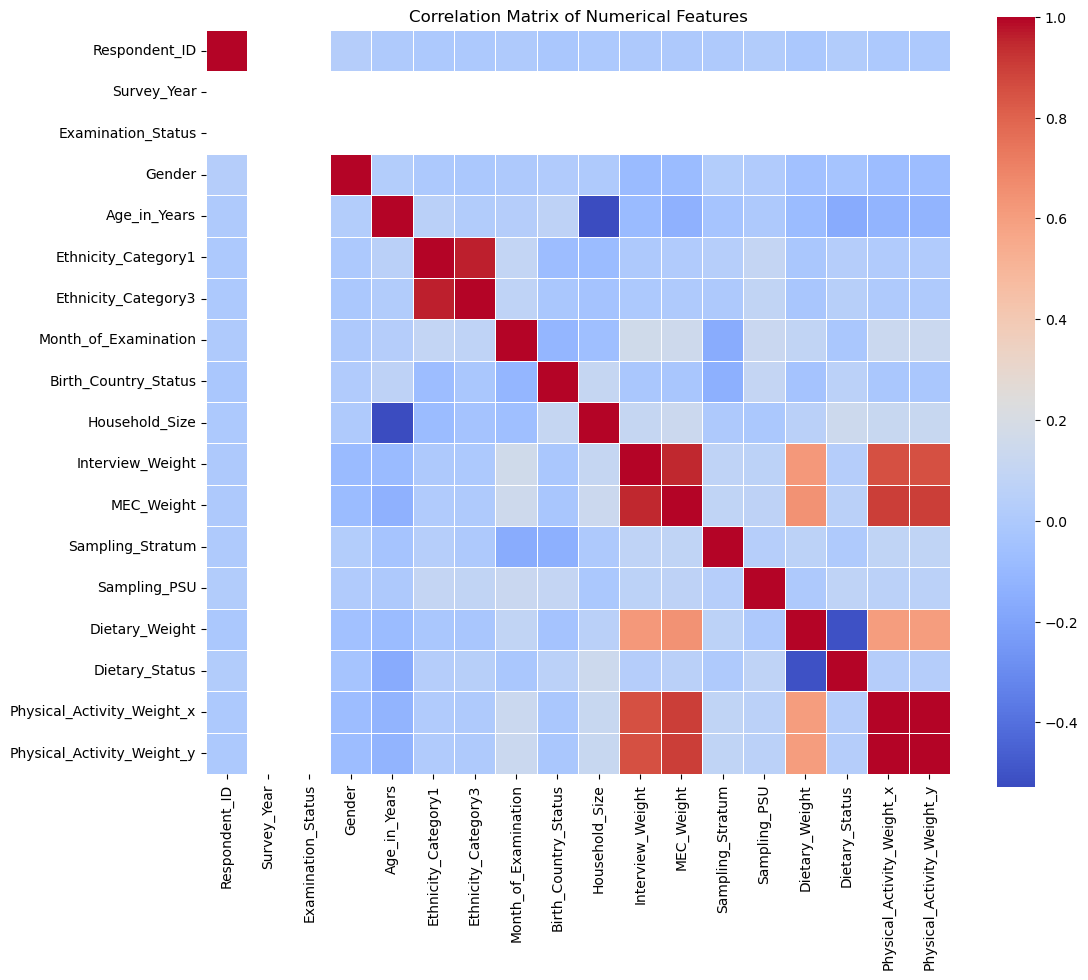

In [147]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar=True,
    square=True
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

*1. Strong Positive Correlations*

"Dietary Weight" vs. "Physical Activity Weight_x" and "Physical Activity Weight_y"
These features show a strong positive correlation (close to red color). This suggests that individuals' weights related to dietary responses are closely aligned with physical activity weights. This relationship could indicate that both metrics are capturing similar aspects of respondents' health or survey design.

*2. Negative Correlations*

"Household Size" vs. "Age_in_Years"
A subtle negative correlation here might reflect that older individuals tend to have smaller household sizes (e.g., empty-nest households, individuals living alone), while younger age groups could be living in larger family households.

*4. Sampling and Weight Relationships*

"Sampling_Stratum" and "Sampling_PSU" (Primary Sampling Units)
These sampling features show some correlation with weights such as MEC Weight and Dietary Weight. This indicates that sampling design plays a role in determining weights to ensure accurate representation across survey strata.

In [148]:
# Highlight the top correlations (excluding self-correlations)
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
strong_correlations = correlation_pairs[
    (correlation_pairs < 1) & (correlation_pairs > 0.5)
].drop_duplicates()

strong_correlations.head(10)

Ethnicity_Category3         Ethnicity_Category1           0.959767
Interview_Weight            MEC_Weight                    0.949888
MEC_Weight                  Physical_Activity_Weight_x    0.901768
Physical_Activity_Weight_x  Interview_Weight              0.855653
Dietary_Weight              MEC_Weight                    0.644221
                            Interview_Weight              0.623160
                            Physical_Activity_Weight_x    0.600927
dtype: float64

Summary

A correlation matrix is calculated to measure the strength and direction of relationships between numerical features. The heatmap visually represents these correlations, with colors indicating the magnitude and direction. Key findings include strong positive correlations between dietary and physical activity weights, a slight negative correlation between household size and age, and relationships between sampling features and survey weights. The top correlations (excluding self-correlations) are highlighted to focus on the most significant feature interactions.

# Advanced Interactive Visualizations

Purpose

The purpose of this code is to create advanced interactive visualizations using Plotly to analyze and explore relationships, trends, and patterns in the dataset.



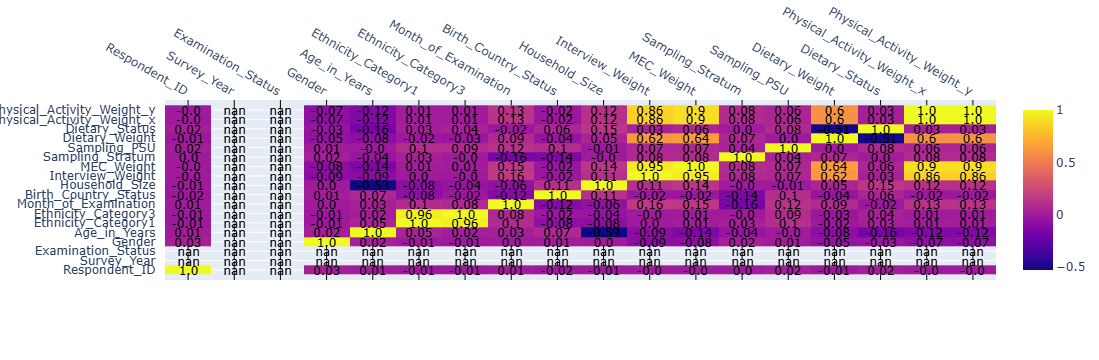

In [149]:
import plotly.figure_factory as ff
##Correlation Heatmap (Interactive):
##Use Plotly to make the heatmap hoverable for better exploration.


# Calculate the correlation matrix, including only numerical features
corr = data_cleaned.select_dtypes(include=np.number).corr()

# Create the annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True
)

fig.show()

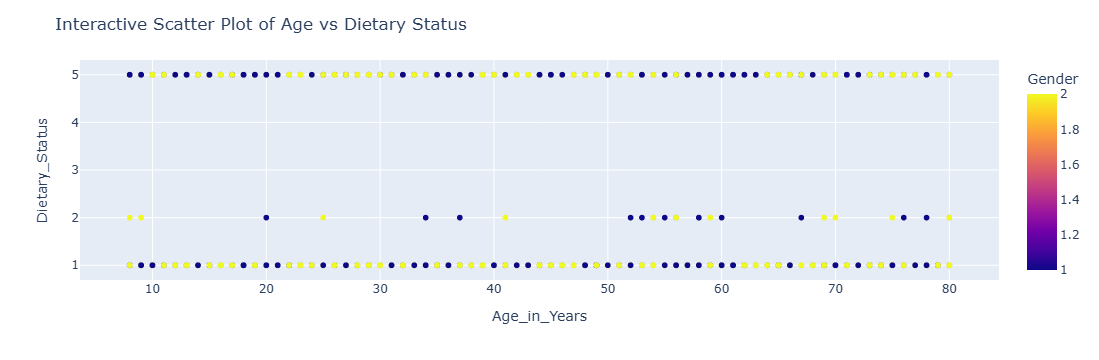

In [150]:
import plotly.express as px
##Allow users to filter by Gender or Age Group.

fig = px.scatter(data_cleaned, x="Age_in_Years", y="Dietary_Status", color="Gender"
, hover_data=["Household_Size"]) 
fig.update_layout(title="Interactive Scatter Plot of Age vs Dietary Status")
fig.show()

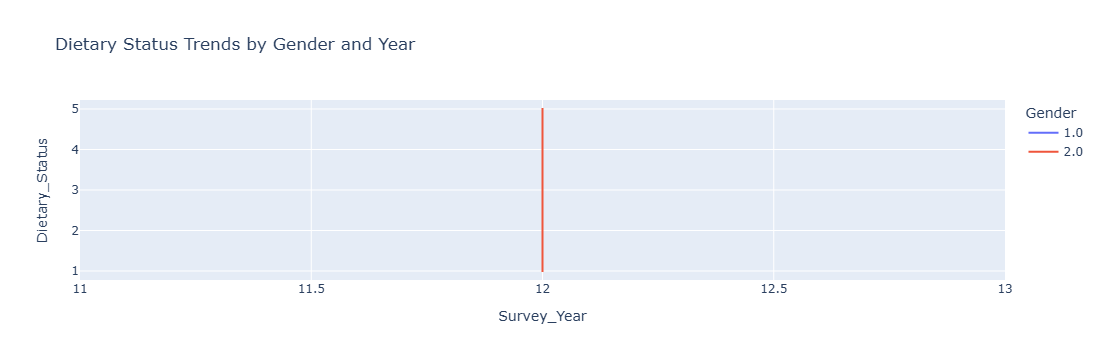

In [151]:
##Add sliders to show trends over Survey_Year or filter data dynamically.

fig = px.line(data_cleaned, x="Survey_Year", y="Dietary_Status", color="Gender",
              title="Dietary Status Trends by Gender and Year")
fig.show()


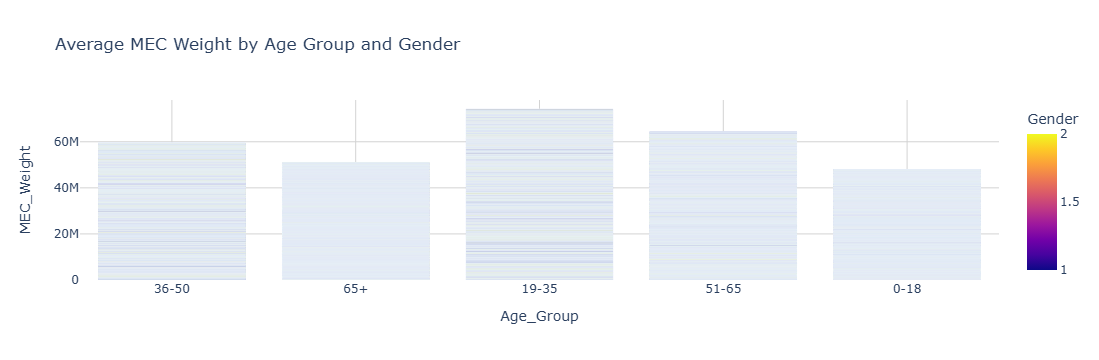

In [152]:
##Visualize average weights across Age Groups, colored by Gender.

fig = px.bar(data_cleaned, x="Age_Group", y="MEC_Weight", color="Gender", barmode="group",
             title="Average MEC Weight by Age Group and Gender")

#fig.update_traces(marker=dict(line=dict(width=1, color='black')))
#fig.update_layout(coloraxis_showscale=True)  # To make the legend more intuitive

fig.update_layout(
    plot_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig.update_traces(hovertemplate="Age Group: %{x}<br>MEC Weight: %{y}<br>Gender: %{color}")

fig.show()


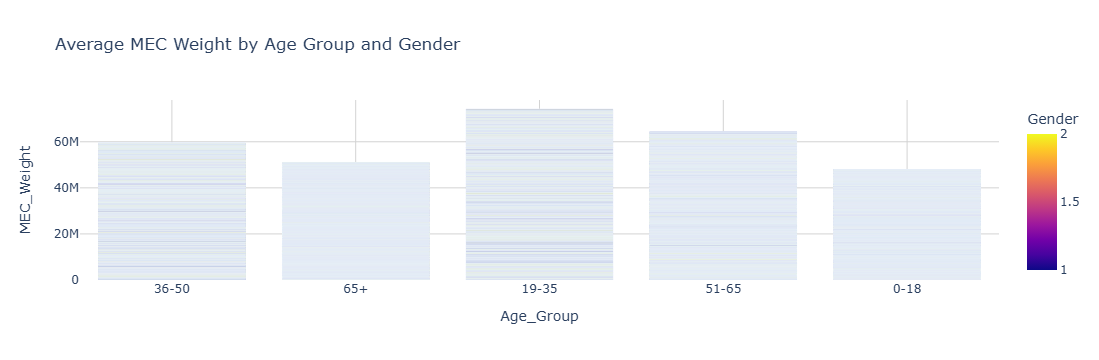

In [153]:
##Visualize average weights across Age Groups, colored by Gender.

fig = px.bar(data_cleaned, x="Age_Group", y="MEC_Weight", color="Gender", barmode="group",
             title="Average MEC Weight by Age Group and Gender")

#fig.update_traces(marker=dict(line=dict(width=1, color='black')))
#fig.update_layout(coloraxis_showscale=True)  # To make the legend more intuitive

fig.update_layout(
    plot_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig.update_traces(hovertemplate="Age Group: %{x}<br>MEC Weight: %{y}<br>Gender: %{color}")

fig.show()


Summary

1. Interactive Correlation Heatmap

Displays a hoverable heatmap of the correlation matrix for numerical features.
Allows users to explore relationships between features with annotations and a color scale.

2. Scatter Plot (Filterable)

Creates a scatter plot of Age_in_Years vs. Dietary_Status.
Data points are colored by Gender, and additional information such as Household_Size is visible when hovering.

3. Line Chart with Trends

Shows trends of Dietary_Status over time using Survey_Year.
Data is filtered and grouped by Gender to analyze trends dynamically.

4. Grouped Bar Chart

Visualizes the average MEC Weight across different Age_Groups, colored by Gender.
Helps in comparing weights across age groups and genders.

# data visualisations using the bokeh package

Purpose of the Visualization
The visualizations are designed to explore and analyze relationships, distributions, and patterns in a dataset related to demographics, dietary habits, and household information using the Bokeh library. Bokeh enables interactive and dynamic visualizations, making it easier to derive insights from the data.



### Step 1: Install and Import Bokeh

In [154]:
##Import required libraries:

from bokeh.models import ColumnDataSource, HoverTool, Slider, Select
from bokeh.layouts import column, row
from bokeh.plotting import figure, show, curdoc
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

1. This visualization will explore the relationship between age and dietary weight, with a hover tool to show additional details.

In [155]:

df =data_cleaned
# Create a ColumnDataSource
source = ColumnDataSource(data={
    'Age': df['Age_in_Years'],
    'Weight': df['Dietary_Weight'],
    'Gender': df['Gender']
})

# Create the scatter plot
scatter_plot = figure(title="Age vs Dietary Weight",
                      x_axis_label='Age (Years)',
                      y_axis_label='Dietary Weight',
                      tools="pan,box_zoom,reset")

scatter = scatter_plot.circle('Age', 'Weight', size=7, color='blue', alpha=0.6, source=source)

# Add a hover tool
hover = HoverTool(tooltips=[
    ("Age", "@Age"),
    ("Weight", "@Weight"),
    ("Gender", "@Gender")
])
scatter_plot.add_tools(hover)

# Show the plot
show(scatter_plot)


2. This interactive histogram lets users adjust the number of bins to explore the distribution of Household Size.


In [156]:
household_size_data = df['Household_Size'].values  # Get NumPy array

def create_histogram(bins=10):
    hist, edges = np.histogram(household_size_data, bins=bins)
    return {'left': edges[:-1], 'right': edges[1:], 'count': hist}

# Initial histogram
initial_hist_data = create_histogram()
source = ColumnDataSource(data=initial_hist_data)

histogram = figure(title="Distribution of Household Size", x_axis_label="Household Size", y_axis_label="Count")
histogram.quad(top='count', bottom=0, left='left', right='right', fill_color="skyblue", line_color="white", source=source)

slider = Slider(start=5, end=50, value=10, step=5, title="Number of Bins")

### I used callback  to make slider wark
callback = CustomJS(args=dict(source=source, slider=slider, household_size_data=household_size_data), code="""
    const bins = slider.value;
    const data = source.data;
    const x = household_size_data;
    const hist = new Array(bins).fill(0);
    const edges = [];

    let min_val = Math.min(...x);
    let max_val = Math.max(...x);
    const bin_width = (max_val - min_val) / bins;

    for (let i = 0; i <= bins; i++) {
        edges.push(min_val + i * bin_width);
    }

    for (let i = 0; i < x.length; i++) {
        const bin_index = Math.floor((x[i] - min_val) / bin_width);
        hist[bin_index]++;
    }

    data['left'] = edges.slice(0, -1);
    data['right'] = edges.slice(1);
    data['count'] = hist;

    source.change.emit(); 
""")

slider.js_on_change('value', callback)

layout = column(slider, histogram)
show(layout)

In [157]:
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.palettes import Viridis256

# Compute the correlation matrix
corr = df.select_dtypes(include=np.number).corr()

# Reshape correlation matrix to long format for Bokeh
corr = corr.stack().reset_index()  # Reshape to long format
corr.columns = ['Feature1', 'Feature2', 'Value']  # Rename columns


# Create ColumnDataSource
source = ColumnDataSource(corr)

# Heatmap figure
heatmap = figure(title="Correlation Heatmap", 
                 x_range=list(df.select_dtypes(include=np.number).columns),  # Use unique Feature1 values for x_range
                 y_range=list(df.select_dtypes(include=np.number).columns),  # Use unique Feature2 values for y_range
                 tools="hover", 
                 tooltips=[("Value", "@Value")])

mapper = LinearColorMapper(palette=Viridis256, low=corr['Value'].min(), high=corr['Value'].max())

# Add rectangles
heatmap.rect('Feature1', 'Feature2', width=1, height=1, source=source, line_color=None, fill_color={'field': 'Value', 'transform': mapper})

# Add color bar
color_bar = ColorBar(color_mapper=mapper, label_standoff=12)
heatmap.add_layout(color_bar, 'right')

# Show heatmap
show(heatmap)

In [158]:
# Map numeric gender values to categorical labels
gender_mapping = {1.0: 'Male', 2.0: 'Female'}
df['Gender'] = df['Gender'].map(gender_mapping)

# Create ColumnDataSource
source = ColumnDataSource(df)
original_source = ColumnDataSource(df)  # Keep original data for filtering

# Define columns for the DataTable
columns = [TableColumn(field=col, title=col) for col in ['Age_in_Years', 'Gender', 'Dietary_Weight', 'Household_Size']]
data_table = DataTable(source=source, columns=columns, width=800, height=400)

# Filter input
filter_input = TextInput(title="Filter by Gender (Male/Female):", value="")

# JS Callback for filtering
filter_input.js_on_change(
    "value",
    CustomJS(
        args=dict(source=source, original_source=original_source),
        code="""
        const value = cb_obj.value.trim().toLowerCase();
        const data = original_source.data;
        const filtered = { Age_in_Years: [], Gender: [], Dietary_Weight: [], Household_Size: [] };

        for (let i = 0; i < data['Gender'].length; i++) {
            const gender = data['Gender'][i] || "";  // Handle missing or empty values
            if (gender.toLowerCase().includes(value)) {
                filtered['Age_in_Years'].push(data['Age_in_Years'][i]);
                filtered['Gender'].push(data['Gender'][i]);
                filtered['Dietary_Weight'].push(data['Dietary_Weight'][i]);
                filtered['Household_Size'].push(data['Household_Size'][i]);
            }
        }
        source.data = filtered;
        source.change.emit();
        """
    )
)

# Layout and display
layout = column(filter_input, data_table)
show(layout)


In [159]:
# Load the dataset
df = pd.read_csv("Updated_name_cleaned_nhanes_data.csv")

# Ensure no missing values for relevant columns
df = df.dropna(subset=['Ethnicity_Category1', 'Dietary_Weight'])

# Convert Ethnicity to strings (to avoid issues with numeric categories)
df['Ethnicity_Category1'] = df['Ethnicity_Category1'].astype(str)

# Prepare initial data for the bar chart
initial_ethnicity_data = df.groupby('Ethnicity_Category1')['Dietary_Weight'].mean().reset_index()
source = ColumnDataSource(data={
    'Ethnicity': initial_ethnicity_data['Ethnicity_Category1'],
    'Weight': initial_ethnicity_data['Dietary_Weight'],
})

# Create Bokeh figure
bar_chart = figure(
    x_range=list(initial_ethnicity_data['Ethnicity_Category1']),  # Ensure x_range uses strings
    title="Average Dietary Weight by Ethnicity",
    x_axis_label="Ethnicity",
    y_axis_label="Average Dietary Weight",
    height=400,
    width=700,
    toolbar_location=None,
)

# Draw the bar chart
bar_chart.vbar(x='Ethnicity', top='Weight', source=source, width=0.8, color="dodgerblue")

# Style adjustments
bar_chart.xgrid.grid_line_color = None
bar_chart.y_range.start = 0
bar_chart.xaxis.major_label_orientation = 0.8

# Dropdown widget to filter chart by Ethnicity
dropdown = Select(title="Ethnicity Filter", value="All", options=["All"] + df['Ethnicity_Category1'].unique().tolist())

# JavaScript callback for dropdown
dropdown_callback = CustomJS(
    args=dict(source=source, ethnicity_data={
        'Ethnicity': df['Ethnicity_Category1'].tolist(),
        'Dietary_Weight': df['Dietary_Weight'].tolist(),
    }),
    code="""
        const selected_ethnicity = cb_obj.value;
        const original_data = ethnicity_data;
        const filtered = { Ethnicity: [], Weight: [] };

        const ethnicityMap = {};

        // Calculate average dietary weight for each ethnicity
        for (let i = 0; i < original_data['Ethnicity'].length; i++) {
            const ethnicity = original_data['Ethnicity'][i];
            const weight = original_data['Dietary_Weight'][i];

            if (!ethnicityMap[ethnicity]) {
                ethnicityMap[ethnicity] = { total: 0, count: 0 };
            }
            ethnicityMap[ethnicity].total += weight;
            ethnicityMap[ethnicity].count += 1;
        }

        // Prepare filtered data
        for (const [ethnicity, stats] of Object.entries(ethnicityMap)) {
            const avg_weight = stats.total / stats.count;
            if (selected_ethnicity === "All" || selected_ethnicity === ethnicity) {
                filtered.Ethnicity.push(ethnicity);
                filtered.Weight.push(avg_weight);
            }
        }

        // Update the source data
        source.data = filtered;
        source.change.emit();
    """
)

dropdown.js_on_change("value", dropdown_callback)

# Combine dropdown and bar chart into a layout
layout = column(dropdown, bar_chart)

# Render in the notebook
output_notebook()
show(layout)


Loading BokehJS ...

Summary of the Visualizations

1. Scatter Plot: Age vs. Dietary Weight

Purpose: Shows the relationship between a person's age and their dietary weight.
Interactive Features:
Hover tool displays additional details such as age, dietary weight, and gender.
Insight: Helps identify trends or outliers in dietary habits across different ages.

2. Histogram: Distribution of Household Size

Purpose: Visualizes the distribution of household sizes in the dataset.
Interactive Features:
A slider allows users to adjust the number of bins dynamically, making it easier to explore data granularity.
Insight: Reveals the most common household sizes and their frequencies.

3. Heatmap: Correlation Matrix

Purpose: Displays the correlations between numerical features in the dataset.
Interactive Features:
Hover tool shows the correlation value for specific feature pairs.
Color bar provides a visual gradient of correlation strengths.
Insight: Identifies strong positive or negative correlations between variables, aiding in feature selection or analysis.


4. Interactive Data Table with Gender Filter

Purpose: Displays the data in a tabular format for better accessibility and allows filtering by gender.
Interactive Features:
Text input dynamically filters the table based on gender (e.g., Male or Female).
Insight: Facilitates quick exploration of subsets of data based on user-defined criteria.

5. Bar Chart: Average Dietary Weight by Ethnicity

Purpose: Compares the average dietary weight across different ethnic categories.
  Interactive Features:
Dropdown menu filters the chart by ethnicity.
Insight: Highlights dietary differences across ethnic groups.


# Summary of notebook

1. Initial Dataset Assessment

The initial shape of the dataset was printed to get an idea of the number of rows and columns.
Missing values in each column were counted to identify problematic features.
Basic statistics (mean, median, etc.) and data types were reviewed to understand the dataset's structure.

2. Handling Missing Data

Columns with more than 95% missing values were dropped as they are unlikely to provide meaningful insights.
Remaining missing values were handled:
For numeric columns, missing values were replaced with the column median.
For categorical columns, missing values were replaced with the most common category (mode).

3. Duplicate Removal

Duplicate rows in the dataset were removed to ensure each record is unique.

4. Column Renaming

Columns were renamed to make them more descriptive and easier to interpret. For example, SEQN was renamed to Respondent_ID, and RIDAGEYR was renamed to Age_in_Years.

5. Saving the Cleaned Dataset

The cleaned and updated dataset was saved as Updated_name_cleaned_nhanes_data.csv for future analysis.
